In [2]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft
import scipy.signal as signal
from math import log10
from scipy.signal import butter, lfilter
from scipy.stats import linregress
from statistics import mean


In [3]:
pip install biosignalsnotebooks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.4 MB/s eta 0:00:00
  Created wheel for libmagic: filename=libmagic-1.0-py3-none-any.whl size=4269 sha256=a5c60529ab4195083d77ebada2697681c92d8ea3f20f4bde0d9e814d5dbbc7ae
  Stored in directory: /root/.cache/pip/wheels/31/ce/d8/099fbd4dbfa5da5596a39eee8a17d2e1bcc29006c07d3563b7
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=7647b0901fa4ad11e9ecce5ce22966ed4a86c55bd09221ce1a22444942336837
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built libmagic wget


In [4]:
import biosignalsnotebooks as bsnb

Text(0.5, 1.0, 'Extensión P2')

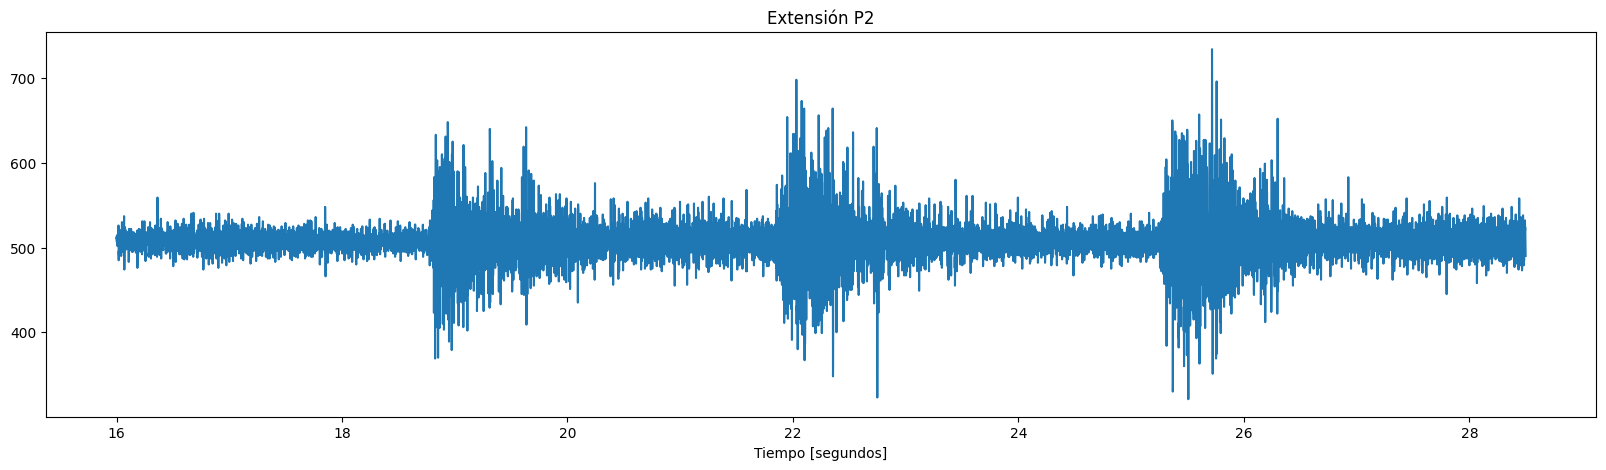

In [5]:
array1 = np.genfromtxt("p2_extension2.txt",   skip_header=1, delimiter="\t")
Fs = 1000
Ts = 1/Fs
señal = array1[:,-2]
señalP = señal[1600:25000]
n = len(señalP)
t = np.arange(16000,16000+n,1)*Ts
plt.figure(figsize=(20,5))
plt.plot(t, señalP)
plt.xlabel("Tiempo [segundos]")
plt.title("Extensión P2")



## Adapatación de la señal

[-0.00638782  0.02235738  0.03832693 ... -0.02235738 -0.0287452
 -0.01277564]


Text(0.5, 1.0, 'Señal EMG')

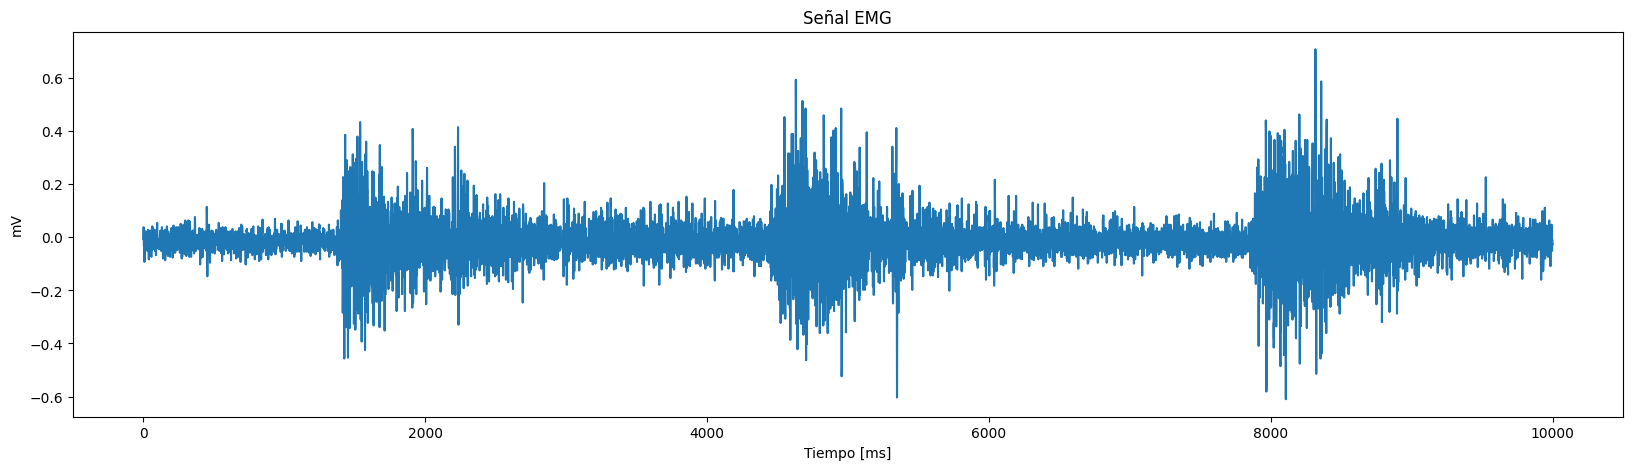

In [6]:
vcc  = 3300 #mV
gain = 1009
resolution = 10
señal = array1[:,-2]
nseñal = (((señal / 2**resolution) - 0.5) * vcc) / gain
nseñal = nseñal[3000:13000]
print(nseñal)
plt.figure(figsize=(20,5))
plt.plot(nseñal)
plt.ylabel("mV")
plt.xlabel("Tiempo [ms]")
plt.title("Señal EMG")

## DETECCIÓN DE EVENTOS

Text(0.5, 1.0, 'Extension P2')

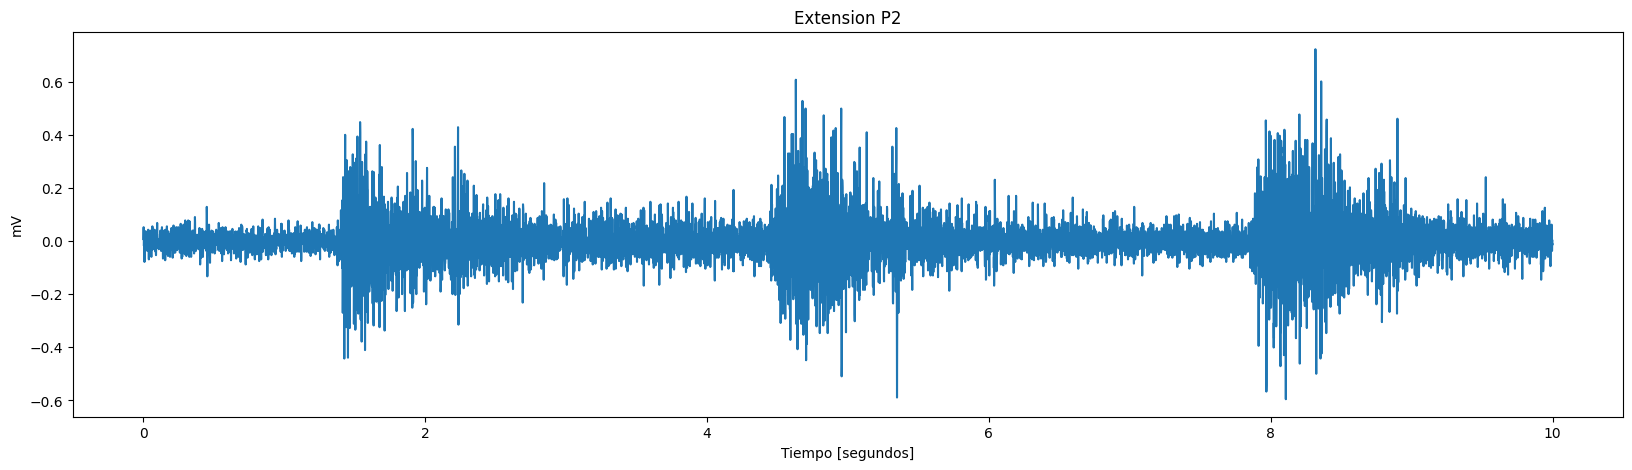

In [7]:
# Eliminacion de la linea de Base

#average = sum(señalP)/len(señalP)
#pre_pro_signal = señalP - average
pre_pro_signal2 = nseñal - np.average(nseñal)
pre_pro_signal2

señalP = pre_pro_signal2
n = len(señalP)
t = np.arange(0,0+n,1)*Ts
plt.figure(figsize=(20,5))
plt.plot(t, señalP)
plt.ylabel("mV")
plt.xlabel("Tiempo [segundos]")
plt.title("Extension P2")

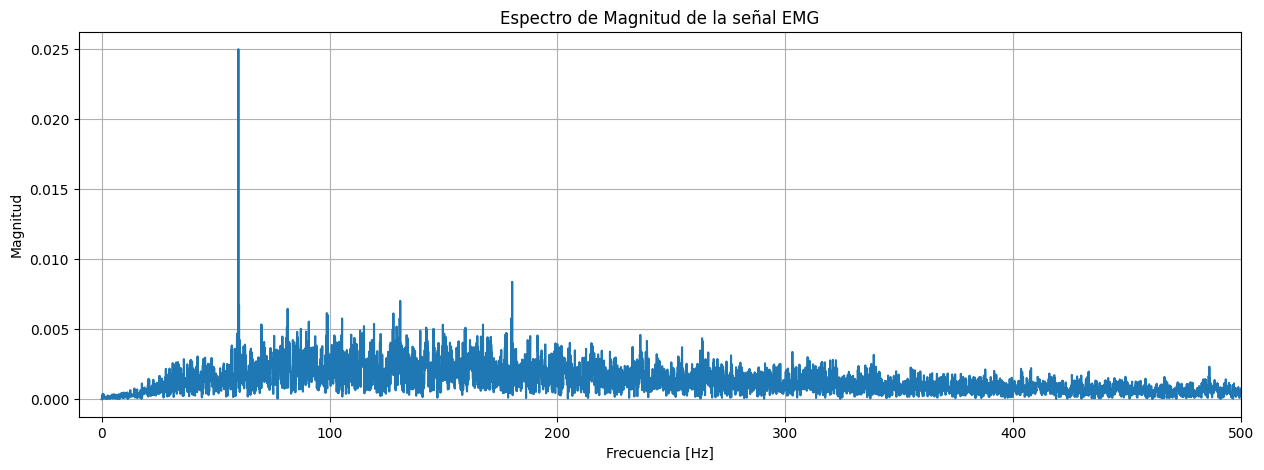

In [8]:
# Analizar el Fourier
emg_senal = pre_pro_signal2
Fs = 1000
Ts = 1/Fs
N = len(emg_senal)
yf = fft(emg_senal)
xf = np.linspace(0.0, 1.0/(2.0*Ts), N//2)
plt.figure(figsize=(15,5))
ejy = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, ejy )
plt.grid()
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.title("Espectro de Magnitud de la señal EMG")
plt.xlim(-10,500)
plt.show()

Text(0.5, 1.0, 'Señal EMG filtrada mediante Filtro Notch')

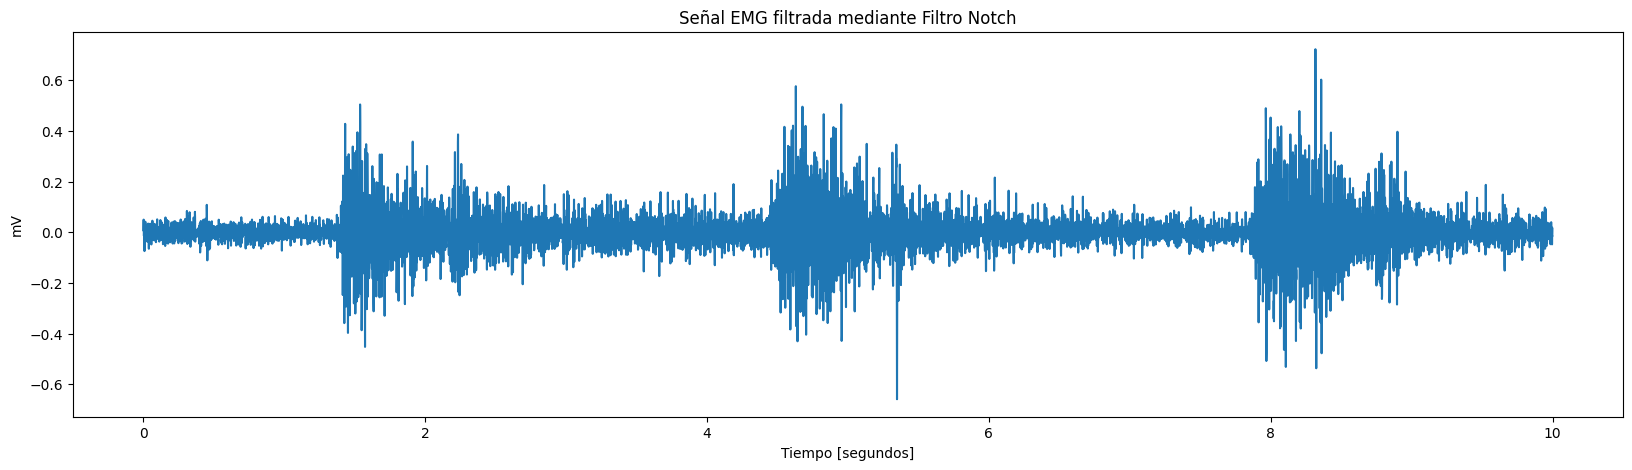

In [9]:
from scipy.signal import iirnotch, lfilter
f0 = 60.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, Fs)
y = lfilter(b, a, emg_senal)
#y = lfilter(b, a, y)

f0 = 180.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0
b, a = iirnotch(f0, Q, Fs)
y = lfilter(b, a, y)

señalP = y
n = len(señalP)
t = np.arange(0,0+n,1)*Ts
plt.figure(figsize=(20,5))
plt.plot(t, señalP)
plt.ylabel("mV")
plt.xlabel("Tiempo [segundos]")
plt.title("Señal EMG filtrada mediante Filtro Notch")


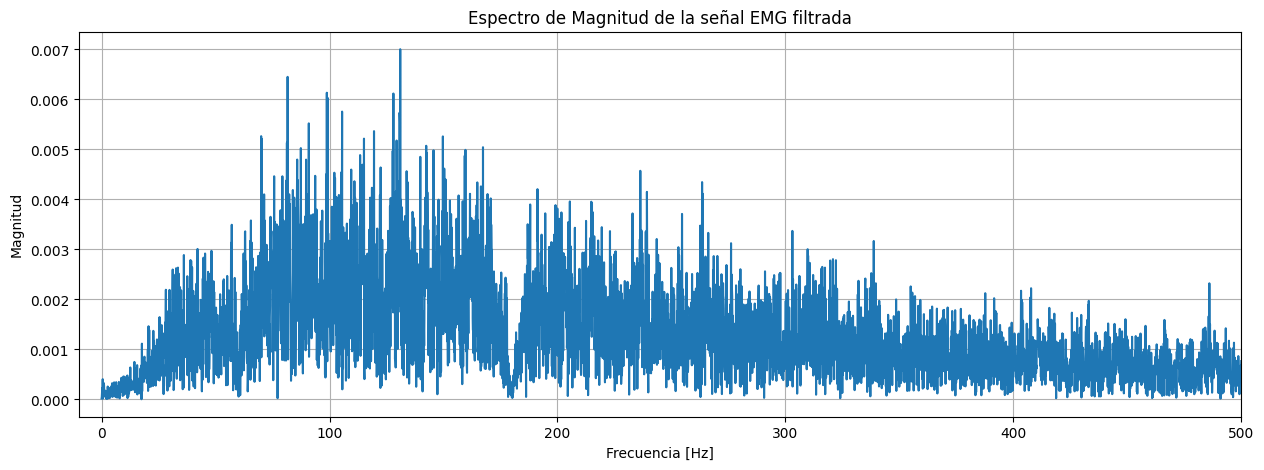

In [10]:
emg_senal = y
Fs = 1000
Ts = 1/Fs
N = len(emg_senal)
yf = fft(emg_senal)
xf = np.linspace(0.0, 1.0/(2.0*Ts), N//2)
plt.figure(figsize=(15,5))
ejy = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, ejy )
plt.grid()
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.title("Espectro de Magnitud de la señal EMG filtrada")
plt.xlim(-10,500)
plt.show()

Text(0.5, 1.0, 'Señal EMG de extensión Filtrada mediante Filtro Pasabanda')

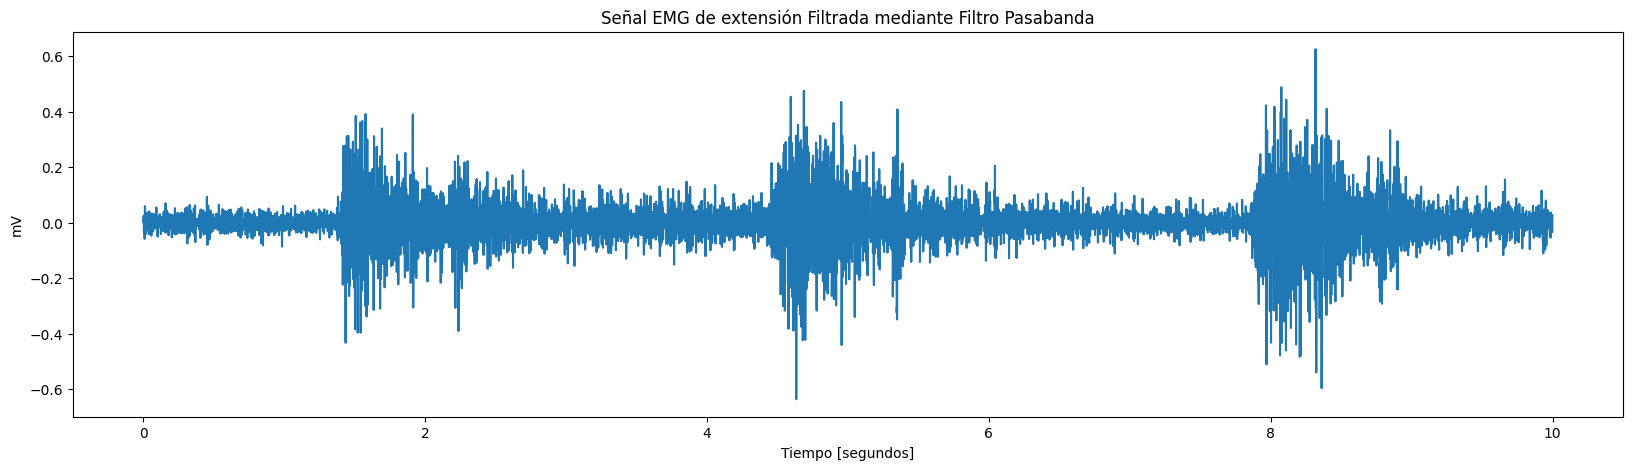

In [11]:
# Filtrado

low_cutoff = 20
high_cutoff = 400

pre_pro_signal = bsnb.aux_functions._butter_bandpass_filter(y, low_cutoff, high_cutoff, Fs)

señalP = pre_pro_signal
n = len(señalP)
t = np.arange(0,0+n,1)*Ts
plt.figure(figsize=(20,5))
plt.plot(t, señalP)
plt.ylabel("mV")
plt.xlabel("Tiempo [segundos]")
plt.title("Señal EMG de extensión Filtrada mediante Filtro Pasabanda")

In [12]:
# Código empleado para generar los archivos numpy de las señales ya filtradas
señalQ = señalP
data = {'señalQ': señalQ}
np.savez('extension2.npz',**data)

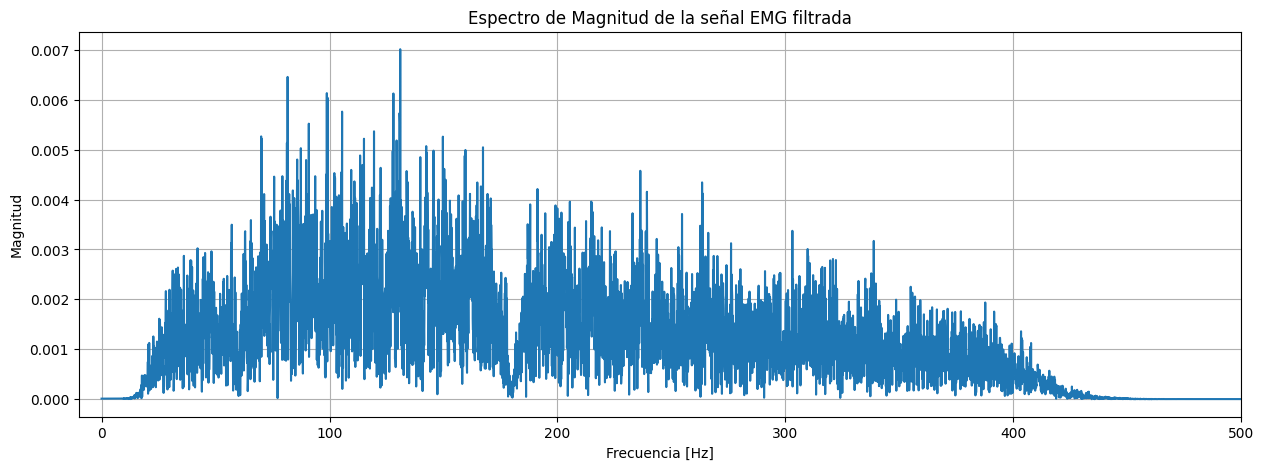

In [13]:
# Analizar el Fourier
emg_senal = pre_pro_signal
Fs = 1000
Ts = 1/Fs
N = len(emg_senal)
yf = fft(emg_senal)
xf = np.linspace(0.0, 1.0/(2.0*Ts), N//2)
plt.figure(figsize=(15,5))
ejy = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, ejy )
plt.grid()
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.title("Espectro de Magnitud de la señal EMG filtrada")
plt.xlim(-10,500)
plt.show()

In [14]:
from statistics import stdev
# Umbral
avg_pre_pro_signal = mean(pre_pro_signal)
std_pre_pro_signal = stdev(pre_pro_signal)

In [15]:
# Deteccion de Activación
burst_begin, burst_end = bsnb.detect_emg_activations(señalP, Fs, smooth_level = 20, threshold_level = 10, time_units = True, plot_result = True)[:2]

## EXTRACCION DE CARACTERISTICAS


In [16]:
# Maximo
max_sample_value = max(señalP)
max_sample_value

0.6253038813029101

In [17]:
# Minimo
min_sample_value = min(señalP)
min_sample_value

-0.6365317859406829

In [18]:
# Promedio

avg_sample_value = np.average(señalP)
avg_sample_value


-6.068072998759144e-06

In [19]:
# Desviacion estandar

std_sample_value = np.std(señalP)
std_sample_value

0.07913587025138574

In [20]:
time_param_dict = {"Maximum EMG": max_sample_value, "Minimum EMG": min_sample_value, "Average EMG": avg_sample_value, "Standard Deviation EMG": std_sample_value}
time_param_dict

{'Maximum EMG': 0.6253038813029101,
 'Minimum EMG': -0.6365317859406829,
 'Average EMG': -6.068072998759144e-06,
 'Standard Deviation EMG': 0.07913587025138574}

In [21]:
# Root Mean Square
from statistics import sqrt

rms = sqrt((sum(señalP*señalP))/len(señalP))
rms

0.07913587048403314

In [22]:
# Area bajo la curva
from scipy import integrate
area = integrate.cumtrapz(señalP)
area

array([ 0.00653455,  0.02467173,  0.0431174 , ..., -0.06428016,
       -0.0851026 , -0.07524419])

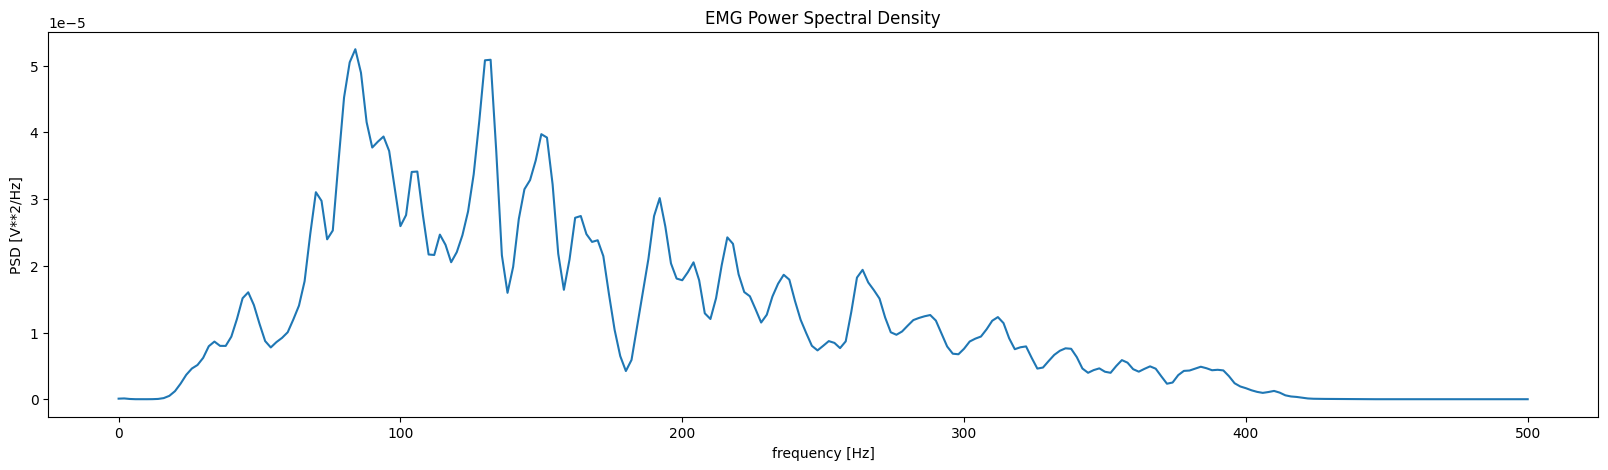

In [23]:
# Potencia espectral de la señal
from scipy import signal
f, P = signal.welch(señalP, fs = Fs, window = 'hann', noverlap = 0, nfft = int(500.))
plt.figure(figsize=(20,5))
plt.plot(f, P)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.title("EMG Power Spectral Density")
plt.show()

In [24]:
# potencia total
area_freq = integrate.cumtrapz(P, f, initial = 0)
total_power = area_freq[-1]
total_power

0.0061208082061912005

In [25]:
# Frecuencia Media

median_freq = f[np.where(area_freq >= total_power / 2)[0][0]]
median_freq

148.0

In [26]:
f_max = f[np.argmax(P)]
f_max

84.0